interactive(children=(FloatSlider(value=0.0, description='HP', max=1.0, step=0.05), FloatSlider(value=1.0, des…

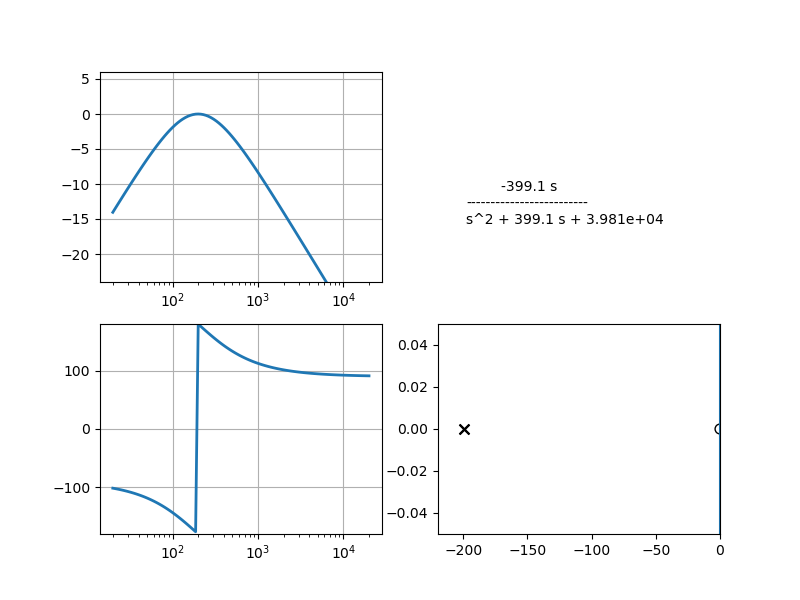

In [30]:
from control import impulse_response, pzmap, TransferFunction
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib widget

plt.close("all")

w = np.geomspace(20, 20000, 100)
t = np.linspace(0, 100, 100)
t = t[t > 0]


def tf(hp, bp, lp, w0, Q):
    s = TransferFunction.s
    return (hp * s ** 2 - bp * w0 / Q * s + lp * w0 ** 2) / (
        s ** 2 + w0 / Q * s + w0 ** 2
    )


def bode(G):
    mag, phase, freq = G.freqresp(w)
    return 20 * np.log10(mag), 180*phase/np.pi, freq


fig, ax = plt.subplots(2, 2, gridspec_kw={"hspace": 0.2, "wspace": 0.2}, figsize=(8, 6))
(ax1, ax2), (ax3, ax4) = ax
G = tf(0, 1, 0, 30, 0.1)
mag, phase, freq = bode(G)
(magline,) = ax1.semilogx(freq, mag, lw=2)
ax1.set_ylim([-24, 6])
ax1.grid()
(phaseline,) = ax3.semilogx(freq, phase, lw=2)
ax3.set_ylim([-180, 180])
ax3.grid()

t = ax2.text(0.1, 0.2, str(G))
ax2.axis('off')

poles, zeros = pzmap(G, plot=False)
if len(poles) > 0:
    pscat = ax4.scatter(
        np.real(poles), np.imag(poles), s=50, marker="x", facecolors="k"
    )
if len(zeros) > 0:
    zscat = ax4.scatter(
        np.real(zeros),
        np.imag(zeros),
        s=50,
        marker="o",
        facecolors="none",
        edgecolors="k",
    )
ax4.set_xlim([-10, 10])
ax4.vlines(0,-10000,10000)

@widgets.interact(
    HP=(0, 1, 0.05), BP=(0, 1, 0.05), LP=(0, 1, 0.05), w0=(1.3, 4.3, 0.1), Q=(0.1, 1, 0.05)
)
def update(HP=0, BP=1, LP=0, w0=2.3, Q=0.5):
    w0 = 10**w0
    G = tf(HP, BP, LP, w0, Q)
    mag, phase, _ = bode(G)
    poles, zeros = pzmap(G, plot=False)
    magline.set_ydata(mag)
    phaseline.set_ydata(phase)
    t.set_text(str(G))
    if len(poles) > 0:
        pscat.set_offsets(np.stack([np.real(poles), np.imag(poles)], axis=1))
    if len(zeros) > 0:
        zscat.set_offsets(np.stack([np.real(zeros), np.imag(zeros)], axis=1))
    vals = np.concatenate([poles, zeros])*1.1
    ax4.set_xlim([np.min(np.real(vals)),np.max(np.real(vals))])
    ax4.set_ylim([np.min(np.imag(vals)),np.max(np.imag(vals))])
    fig.canvas.draw_idle()


plt.show()
